In [167]:
#Importing the required modules
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp


In [168]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

# To Train our data
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score


In [169]:
Ad=pd.read_csv(r"C:\Users\Genet Shanko\Task_two\AdSmartABdata.csv",na_values=['numeric_only',None])
Ad.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [170]:
Ad.columns.tolist()

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

In [171]:
Ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [172]:
Adcells= len(Ad)
Adcells

8077

In [173]:
 Ad.shape

(8077, 9)

In [174]:
Ad.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [175]:
Ad[['device_make']].describe()

,device_make
count,8077
unique,270
top,Generic Smartphone
freq,4743


In [176]:
Ad[['platform_os']].describe()

,platform_os
count,8077.000000
mean,5.947134
std,0.224333
min,5.000000
25%,6.000000
50%,6.000000
75%,6.000000
max,7.000000


In [177]:
Ad[['browser']].describe()

,browser
count,8077
unique,15
top,Chrome Mobile
freq,4554


In [178]:
Ad[['yes']].describe()

,yes
count,8077.000000
mean,0.070818
std,0.256537
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [199]:
Ad[['no']].describe()

,no
count,8077.000000
mean,0.083075
std,0.276013
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [200]:
Ad[Ad.auction_id.duplicated(keep=False)]

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


# A/B testing 

In [202]:
p_new = Ad.mean()
p_new

hour           11.615080
platform_os     5.947134
yes             0.070818
no              0.083075
dtype: float64

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
Name: device_make, dtype: int64

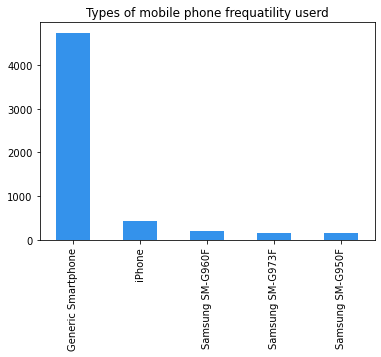

In [180]:
mobile_type= Ad['device_make'].value_counts()[0:5]
mobile_type.plot.bar(x='device_make', title="Types of mobile phone frequatility userd", stacked=True, color='#3492eb')
mobile_type

Chrome Mobile            4554
Chrome Mobile WebView    1489
Samsung Internet          824
Facebook                  764
Mobile Safari             337
Name: browser, dtype: int64

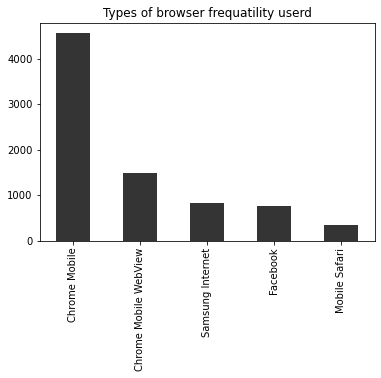

In [181]:
browser_type= Ad['browser'].value_counts()[0:5]
browser_type.plot.bar(x='browser', title="Types of browser frequatility userd", stacked=True, color='#343434')
browser_type

6    7648
5     428
7       1
Name: platform_os, dtype: int64

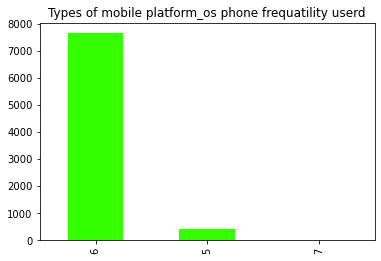

In [182]:
platform_os_type= Ad['platform_os'].value_counts()[0:1000]
platform_os_type.plot.bar(x='platform_os', title="Types of mobile platform_os phone frequatility userd", stacked=True, color='#34ff00')
platform_os_type

control    4071
exposed    4006
Name: experiment, dtype: int64

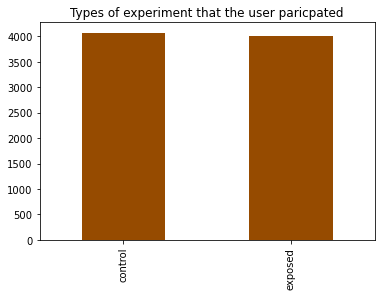

In [183]:
experiment_type= Ad['experiment'].value_counts()[0:1000]
experiment_type.plot.bar(x='experiment', title="Types of experiment that the user paricpated", stacked=True, color='#964b00')
experiment_type


0    7505
1     572
Name: yes, dtype: int64

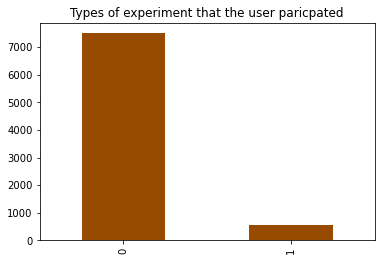

In [184]:
yes_type= Ad['yes'].value_counts()[0:1000]
yes_type.plot.bar(x='yes', title="Types of experiment that the user paricpated", stacked=True, color='#964b00')
yes_type

0    7406
1     671
Name: no, dtype: int64

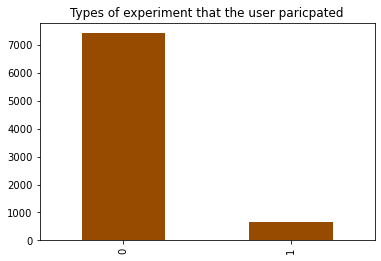

In [185]:
no_type= Ad['no'].value_counts()[0:8000]
no_type.plot.bar(x='no', title="Types of experiment that the user paricpated", stacked=True, color='#964b00')
no_type

In [186]:
users_data = Ad.groupby('auction_id')

In [187]:
users_sessions= users_data['experiment'].count()
users_sessions.head(100)

auction_id
0008ef63-77a7-448b-bd1e-075f42c55e39    1
000eabc5-17ce-4137-8efe-44734d914446    1
0016d14a-ae18-4a02-a204-6ba53b52f2ed    1
00187412-2932-4542-a8ef-3633901c98d9    1
001a7785-d3fe-4e11-a344-c8735acacc2c    1
                                       ..
030f8197-4daa-4584-a43a-a5805d6947e4    1
0315f5f3-d286-4d23-abbc-1c7b8401991f    1
0320f9a0-7e0a-4c0d-a553-66c75d71a2ea    1
03244a64-9192-40fc-9bd7-7edd1bd9643a    1
0332792f-0de9-4902-9d08-06033c3d8371    1
Name: experiment, Length: 100, dtype: int64

In [188]:
import plotly.io as pio
from IPython.display import Image
def mult_hist(sr, rows, cols, title_text, subplot_titles, interactive=False):
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)
    for i in range(rows):
        for j in range(cols):
            x = ["-> " + str(i) for i in sr[i+j].index]
            fig.add_trace(go.Bar(x=x, y=sr[i+j].values), row=i+1, col=j+1)
    fig.update_layout(showlegend=False, title_text=title_text)
    if(interactive):
        fig.show()
    else:
        return Image(pio.to_image(fig, format='png', width=1200))

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import mean

In [190]:
yes = 10
production = np.random.normal(loc=20,scale=5,size=yes)

In [191]:
Ad.isnull().sum()


auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [192]:
Ad_mean = Ad.mean()
Ad_mean

hour           11.615080
platform_os     5.947134
yes             0.070818
no              0.083075
dtype: float64

In [193]:
Ad_var = Ad.var()
Ad_var

hour           32.888841
platform_os     0.050325
yes             0.065811
no              0.076183
dtype: float64

In [194]:
alpha_mom = Ad_mean ** 2 / Ad_var
beta_mom = Ad_var / Ad_mean

In [195]:
alpha_mom, beta_mom

(hour             4.102002
 platform_os    702.797314
 yes              0.076206
 no               0.090591
 dtype: float64,
 hour           2.831564
 platform_os    0.008462
 yes            0.929297
 no             0.917038
 dtype: float64)

In [208]:
def users_guess(n,verbose=True):
    score=[]
    for _ in range(n):
        users_answers = []
        for _ in range(16):
            users_answers.append(np.random.choice(yes))
        if verbose:
            print("My name is Bond...James Bond, and I say the glasses are as follows:",users_answers)
        correct_guess = np.sum(np.array(users_answers)==np.array(glasses))
        if verbose:
            print("\nMr. James Bond gave {} correct answers".format(correct_guess))
            print("-"*100)
        score.append(correct_guess)
    return np.array(score)

In [210]:
score = users_guess(5000,verbose=False)
print(np.sum(score>=13)/10000)

0.0


In [212]:
score = users_guess(1000,verbose=False)
prob = []
guess = []
for i in range(10):
    print(f"Probability of answering {i} correct: {np.sum(score==i)/10000}")
    prob.append(np.sum(score==i)/10000)
    guess.append(i)

Probability of answering 0 correct: 0.1
Probability of answering 1 correct: 0.0
Probability of answering 2 correct: 0.0
Probability of answering 3 correct: 0.0
Probability of answering 4 correct: 0.0
Probability of answering 5 correct: 0.0
Probability of answering 6 correct: 0.0
Probability of answering 7 correct: 0.0
Probability of answering 8 correct: 0.0
Probability of answering 9 correct: 0.0


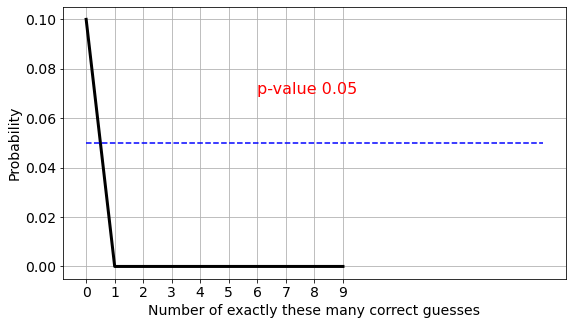

In [213]:
plt.figure(figsize=(9,5))
plt.plot(guess,prob,c='k',lw=3)
plt.xlabel("Number of exactly these many correct guesses",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.xticks(guess,fontsize=14)
plt.yticks(fontsize=14)
plt.hlines(y=0.05,xmin=0,xmax=16,color='blue',linestyle='--')
plt.text(s="p-value 0.05",x=6,y=0.07,fontsize=16,color='red')
plt.grid(True)
plt.show()

In [217]:
score = users_guess(10000,verbose=False)
prob = []
guess = []
for i in range(1,10):
    print(f"Probability of answering at least {i} correct: {np.sum(score>=i)/10000}")
    prob.append(np.sum(score>=i)/10000)
    guess.append(i)

Probability of answering at least 1 correct: 0.0
Probability of answering at least 2 correct: 0.0
Probability of answering at least 3 correct: 0.0
Probability of answering at least 4 correct: 0.0
Probability of answering at least 5 correct: 0.0
Probability of answering at least 6 correct: 0.0
Probability of answering at least 7 correct: 0.0
Probability of answering at least 8 correct: 0.0
Probability of answering at least 9 correct: 0.0


In [ ]:
Data
8077 users are partipcapated in the experiment control    4071 ,exposed    4006 
Function used in the code
Numpy Binomial distribution because this is a matter of YES/NO answers (from the parents)

Scipy independent t-test because we are interested in a two-sided test of equal/unequal means

In [220]:
n1 = 8077
p1 = 0.090602214

n2 = 8077
p2 = 0.076215856

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [221]:
print("users of who provide")
print("-"*55)
print(f"{population1.sum()} users answered YES and {n1-population1.sum()} users answered NO")
print("\nusers  of who ansers no")
print("-"*55)
print(f"{population2.sum()} users answered YES and {n2-population2.sum()} users answered NO")


users of who provide
-------------------------------------------------------
708 users answered YES and 7369 users answered NO

users  of who ansers no
-------------------------------------------------------
624 users answered YES and 7453 users answered NO


In [225]:
t_stat,pval=scipy.stats.ttest_ind(population1, population2)

In [226]:
print("The t-statistic from this data:",t_stat)
print("Corresponding p-value from this data:",pval)

The t-statistic from this data: 2.4030596055573255
Corresponding p-value from this data: 0.016269741816508518


In [236]:
def users1_guess(n,verbose=True):
    score=[]
    for _ in range(n):
        users_answers = []
        for _ in range(16):
            users1_answers.append(np.random.choice(no))
        if verbose:
            print("users answer for the questions:",users1_answers)
        correct_guess = np.sum(np.array(users1_answers)==np.array(glasses))
        if verbose:
            print("\nusers answers {} correct answers".format(correct_guess))
            print("-"*100)
        score.append(correct_guess)
    return np.array(score)